In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\nbwan\Python\Data Science\updatedfood.csv')

df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Bothhome                 int64
Education_Bin            int64
Marital_Status_Bin       int64
Age_Bin 

Below is basically all of the demographic data that was avaiable in the dataset. As mentioned on the other notebook, I put most of the features into bins so that the model can make better assumptions. The only feature that isn't in a bin is the "Bothhome" feature which is just a binary 1 for yes for teens or children in household or 0 for no children in household

In [125]:
features = df[['Income_Bin', 'Age_Bin','Bothhome','Education_Bin', 'Marital_Status_Bin']]

features

,Income_Bin,Age_Bin,Bothhome,Education_Bin,Marital_Status_Bin
0,3,2,0,1,1
1,3,2,1,1,1
2,4,2,0,1,2
3,2,4,1,1,2
4,3,4,1,3,3
...,...,...,...,...,...
2211,4,3,1,1,3
2212,4,1,1,3,2
2213,3,4,0,1,4
2214,4,2,1,2,2


Since the point of this project is to segment customers I felt that a KNN model would be best fit for this, not to sound too literal but the point of this project is to find customers that similar, as if they were neighbors in the hypothetical sense.

In [126]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


Below you can see the Elbow method for clustering. I believe the trade-off between 4 and 5 was not drastic enough and decided that 5 would be appropriate enough. 3 and less what not enough in my opinion and for 6 and greater the dropoff was too much and the clustering just wouldn't really make a ton of sense based on the available data, there would have too much overlap that you really could not make any inferences

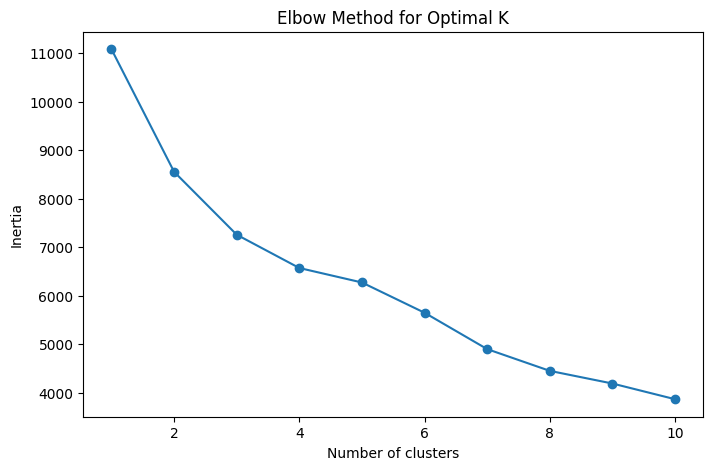

In [127]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Here is the visualization of the clusters. As you can see there is some overlap, especially with cluster 3 and 4, which means they are probably have very similar customer profiles, but overall espcially with Clusters 0-2 you can see distinct regions with them that indicate the model was able to see more than obvious distinctions between the customer profiles. For the rest of the notebook there are just some summary statistics and an export of the CSV so I could use the data to make dashboards of each segment. 

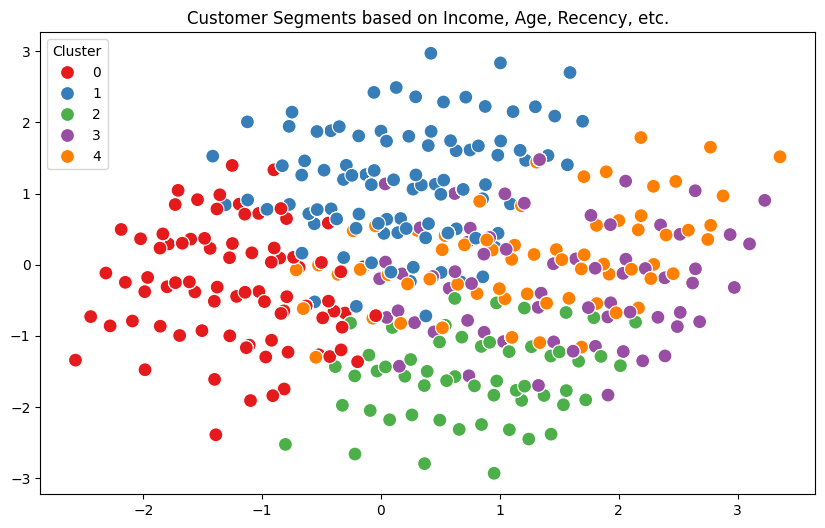

Cluster centers:
 [[-0.88367515  0.60177686  0.540638   -0.2916033  -0.56609364]
 [ 0.1327719  -0.33072743  0.66536331  0.20263816  0.55604778]
 [ 0.89436425  1.06123711 -1.45559547  0.05532095 -0.70457373]
 [ 0.78516568 -1.37020869 -1.03685478  0.1656094  -0.73611616]
 [ 0.45771831 -0.31328493 -1.5029383  -0.08768576  0.9328165 ]]


In [128]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments based on Income, Age, Recency, etc.')
plt.show()

centers = kmeans.cluster_centers_
print("Cluster centers:\n", centers)

In [129]:
df['Cluster'] = kmeans.labels_  
df['Cluster'] = df['Cluster'].astype("int64")

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Bothhome,Education_Bin,Marital_Status_Bin,Age_Bin,Income_Bin,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,0,1,1,2,3,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,1,1,1,2,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,0,1,2,2,4,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,1,1,2,4,2,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,1,3,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,1,1,3,3,4,1
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,1,3,2,1,4,3
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,0,1,4,4,3,4
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,1,2,2,2,4,1


In [130]:
df.to_csv("clustered.csv", index=False)

In [131]:
df = df.select_dtypes(exclude='object')


In [132]:
cluster_summary = df.groupby('Cluster').agg(['mean', 'std'])
cluster_summary

ID                Year_Birth                   Income  \
                mean          std         mean        std          mean   
Cluster                                                                   
0        5523.379056  3252.812147  1975.749263   8.718084  33932.517699   
1        5580.741135  3247.534796  1965.100473   9.105851  54733.650118   
2        5726.628821  3291.971375  1981.414847   7.947633  71671.519651   
3        5733.135514  3206.001679  1953.719626   6.242809  68310.140187   
4        5539.534137  3262.356528  1965.192771  10.705129  61999.381526   

                        Kidhome            Teenhome            ...  Bothhome  \
                  std      mean       std      mean       std  ...      mean   
Cluster                                                        ...             
0        13991.625850  0.809735  0.452232  0.390855  0.511930  ...  0.942478   
1        26244.463029  0.456265  0.528347  0.880615  0.365594  ...  1.000000   
2        18781.144887  0.048035  0.284633  0.039301  0.253452  ...  0.021834   
3        18018.315878  0.070093  0.306032  0.294393  0.541487  ...  0.214953   
4        23889.773763  0.072289  0.374051  0.152610  0.532041  ...  0.000000   

                  Education_Bin           Marital_Status_Bin            \
              std          mean       std               mean       std   
Cluster                                                                  
0        0.233009      1.454277  0.674589           1.895280  0.836364   
1        0.000000      1.852246  0.844425           2.992908  0.732958   
2        0.146462      1.733624  0.839672           1.759825  0.777396   
3        0.411753      1.822430  0.842677           1.728972  0.726043   
4        0.000000      1.618474  0.774480           3.361446  0.481387   

          Age_Bin           Income_Bin            
             mean       std       mean       std  
Cluster                                           
0        3.216814  0.628153   2.019174  0.835645  
1        2.398345  0.680026   3.191489  0.780668  
2        3.620087  0.495363   4.069869  0.875801  
3        1.485981  0.500975   3.943925  0.896857  
4        2.413655  0.783894   3.566265  1.271836  

[5 rows x 62 columns]